# Target analysis
**Purpose**:
* put features into context with predicted or actual target values
  * analyse feature distribution per group in binary classification
  * check correlation of features with target value
* check 'certainty' of the model predictions by plotting `prob_distrib_per_class` to see how certain the model is in predicting each class
* visually check predicted vs actual(ground truth values)
  * by simple scatter plot
  * by 'improved scatter plot' (`joint_dist`) - this can be usefull if the actual values form a cluster (eg. regression applied to clusters of users) and we want check if the model predictions also form a nice cluster with similar distribution as actual values

**Intended use**:
* check how your model is perfroming
* check the possible connection between feature and target values (eg. if the distributions of features are different for each class)

## Imports

In [1]:
import os
import sys

sys.path.append(os.getcwd())
os.chdir("../..")

import pandas as pd
from churn_pred.eda.target.analysis import correlation
from churn_pred.eda.target.plotting import (
    prob_distrib_per_class,
    distributions_in_binary_cls,
)

## Dataset

In [2]:
df_pd = pd.read_csv("data/dataset.csv")
df_pd.head()

In [4]:
target_col = 
id_col = 
cat_cols = 
cont_cols = df_pd.drop(columns=id_col + cat_cols + target_col).columns.values.tolist()

,user_id,count_errorfound_time_stamp,count_applaunched_time_stamp,count_applaunched_install_time,count_depositclicked_time_stamp,count_depositdialogviewed_time_stamp,count_depositinitiated_time_stamp,count_depositoffersshowed_time_stamp,count_depositpackclicked_time_stamp,count_depositvaluechanged_time_stamp,...,avg_urostercancelled_rake_amount,min_urostercancelled_rake_amount,max_urostercancelled_rake_amount,avg_memoryinfoongamelaunch_native_memory_now_in_mb,min_memoryinfoongamelaunch_native_memory_now_in_mb,max_memoryinfoongamelaunch_native_memory_now_in_mb,count_topupdialogviewed_app_version,count_g_bench_low_fps_time_stamp,target_ltv,target
0,005vT7y75hVO1fZMsSR6W1h9l583,56,11,0,5,2,3,13,3,19,...,NaN,NaN,NaN,41.804474,41.804474,41.804474,16,9,1.257455,1.257455
1,00EbaSg3fTO7Sev8pYoWAJq9Hc43,50,5,0,1,<NA>,1,7,<NA>,7,...,NaN,NaN,NaN,NaN,NaN,NaN,5,<NA>,6.185779,6.185779
2,00FQoVOsL7Qke16BNqqsHoyt7Ul1,26,1,0,1,<NA>,1,4,<NA>,1,...,NaN,NaN,NaN,312.256586,51.415237,829.290985,1,<NA>,5.475000,5.475000
3,00HAhMxOURSSwmEVhSfQDKwRxKz1,250,61,0,2,3,<NA>,1,<NA>,7,...,NaN,NaN,NaN,59.936310,59.936310,59.936310,22,11,0.309360,0.309360
4,00JEpTvvm4RXvv8wkihCTVAngAH3,12,1,0,<NA>,<NA>,<NA>,1,<NA>,<NA>,...,NaN,NaN,NaN,64.058823,64.058823,64.058823,2,<NA>,0.087146,0.087146


### Analysis

sum_ucashout_amount_status_REVERSED    1.000000
avg_ucashout_amount_status_REVERSED    1.000000
min_ucashout_amount_status_REVERSED    1.000000
max_ucashout_amount_status_REVERSED    1.000000
sum_ucashout_amount_status_FAILED      0.573795
Name: target_ltv, dtype: float64

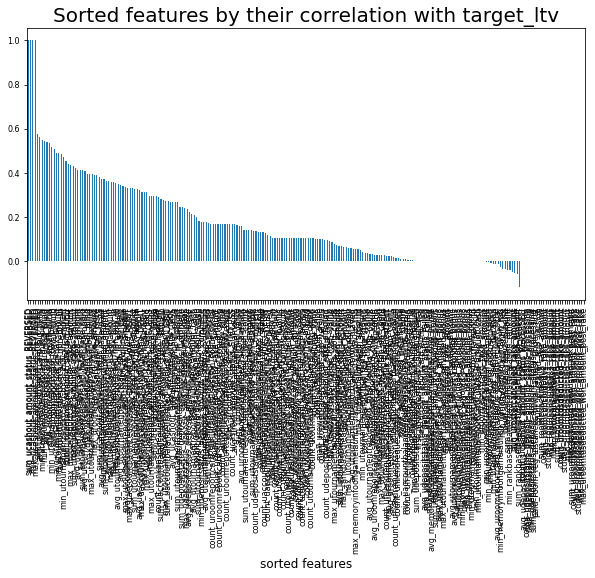

In [6]:
sorted_corr_cols, fig = correlation(
    df=df_pd[cont_cols],
    target=df_pd[target_col],
    scale="linear",
    plot=True,
)

sorted_corr_cols.head()

### Plotting
Predicted and actual/ground_truth values were gathered using LightGBM with Optuna optimizer on the dataset

In [2]:
data_predict_proba_binary = pd.read_parquet()
data_ground_truth = pd.read_parquet()
data_predict_cls_binary = pd.read_parquet()

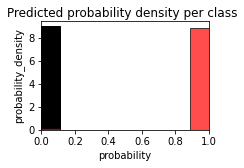

In [11]:
fig = prob_distrib_per_class(
    predicted_probs=data_predict_proba_binary.values.flatten(),
    actual=data_ground_truth.values.flatten(),
    task="binary",
)

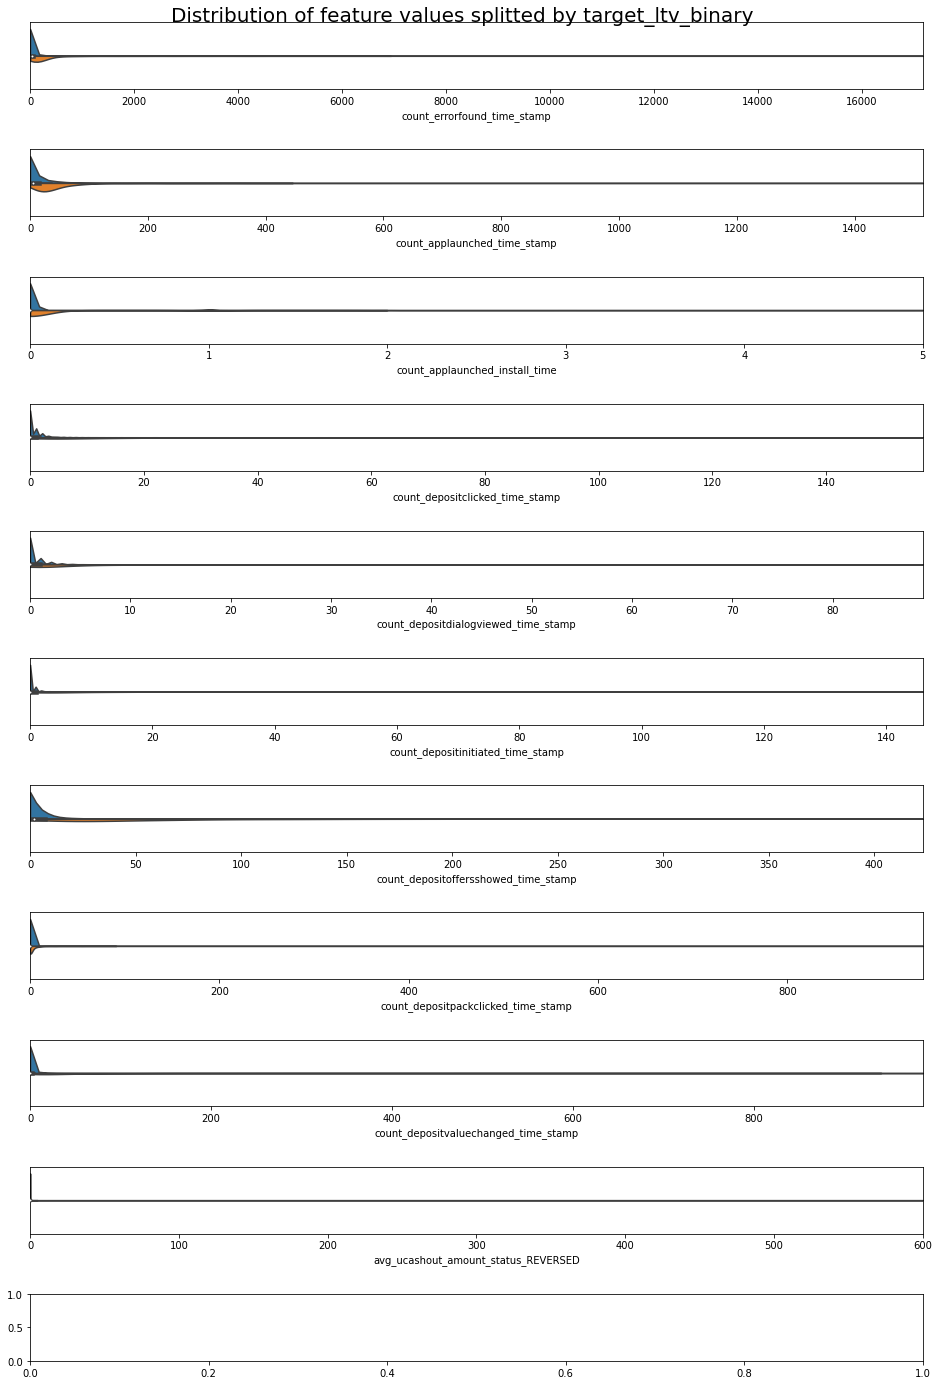

In [10]:
fig = distributions_in_binary_cls(
    df=df_pd[cont_cols[:10]],
    target=data_predict_cls_binary["target_ltv_binary"],
    low_per_cut=0,
    high_per_cut=1,
)